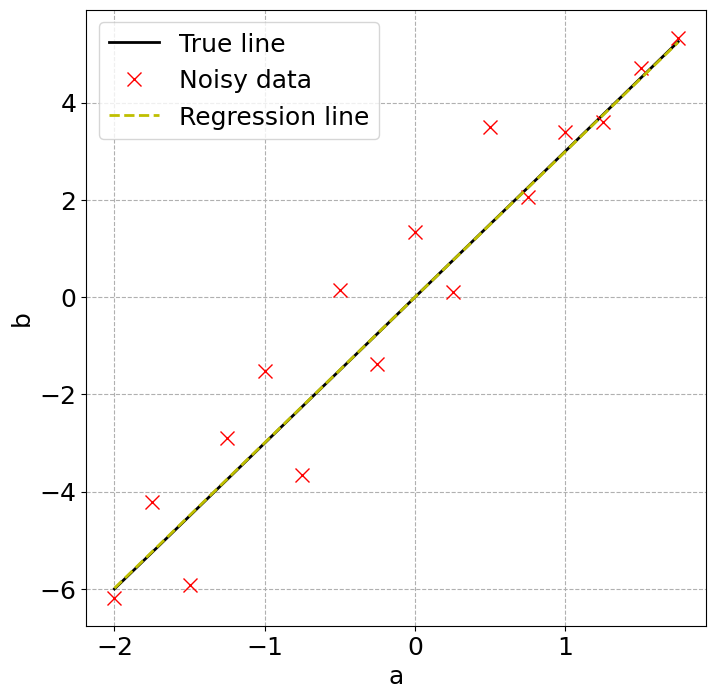

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set run time configurations for plots - size is 8x8 inches, font size is 18
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 18


x = 3 # True slope

#Builds an array of a values from -2 to 2 with step size 0.25 - 16 values
a = np.arange(-2,2,0.25)

# reshape a to be a column vector. -1 infers the number of rows automatically based on the length of a
# second argument 1 specifies that there is 1 column.
a = a.reshape(-1, 1)

# Generate b values based on the true slope x and add Gaussian noise
# np.random.randn generates samples from the standard normal distribution
# here - *a.shape unpacks the shape of a to match the dimensions of the noise to be added
b = x*a + np.random.randn(*a.shape) # Add noise

plt.plot(a, x*a, '-', color='k', linewidth=2, label='True line') # True relationship
plt.plot(a, b, 'x', color='r', markersize=10, label='Noisy data') # Noisy measurements

# SVD on an overdetermined system to find least-squares solution
U, S, VT = np.linalg.svd(a,full_matrices=False)
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b # Least-square fit

plt.plot(a,xtilde * a,'--',color='y',linewidth=2, label='Regression line')

plt.xlabel('a')
plt.ylabel('b')

plt.grid(linestyle='--')
plt.legend()
plt.show()



In [6]:
# Three methods of computing regression

xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
xtilde2 = np.linalg.pinv(a) @ b

# The third method is specific to Matlab:
# xtilde3 = regress(b,a)